In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
import seaborn as sns
import statsmodels
# sns.set_theme(color_codes=True)


In [29]:
ann_df = pd.read_csv('all_annotated.csv')


In [32]:
np.log2(119.325905+0.1)

6.899971999253486

In [95]:
ann_df['median']=ann_df.loc[:,"male_10":"female_14D"].median(axis=1)#calculate the mean FPKM
ann_df.drop(ann_df[ann_df['median']<=0].index, inplace = True) #remove the rows with mean<=0
FPKM_df=ann_df.copy()#make a deep copy of the original df
FPKM_df.loc[:,"male_10":"median"]=np.log2(ann_df.loc[:,"male_10":"median"]+0.1)#transfer the FPKM
FPKM_df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,4.178105
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,2.908499
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,4.063295
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,5.675952
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,6.217169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,6.168592
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,7.725516
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,10.902223
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,-2.985605


# Clustering

In [96]:
# generate the linkage matrix of genes
X_gene=FPKM_df.loc[:,"male_10":"female_14D"]
Z_gene=linkage(X_gene, 'ward')# [idx1, idx2, dist, sample_count]

In [97]:
#generate the linkage matrix of samples
X_sample=FPKM_df.loc[:,"male_10":"female_14D"].T
Z_sample=linkage(X_sample, 'ward')# [idx1, idx2, dist, sample_count]

/Users/xiangning/miniconda3/lib/python3.6/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


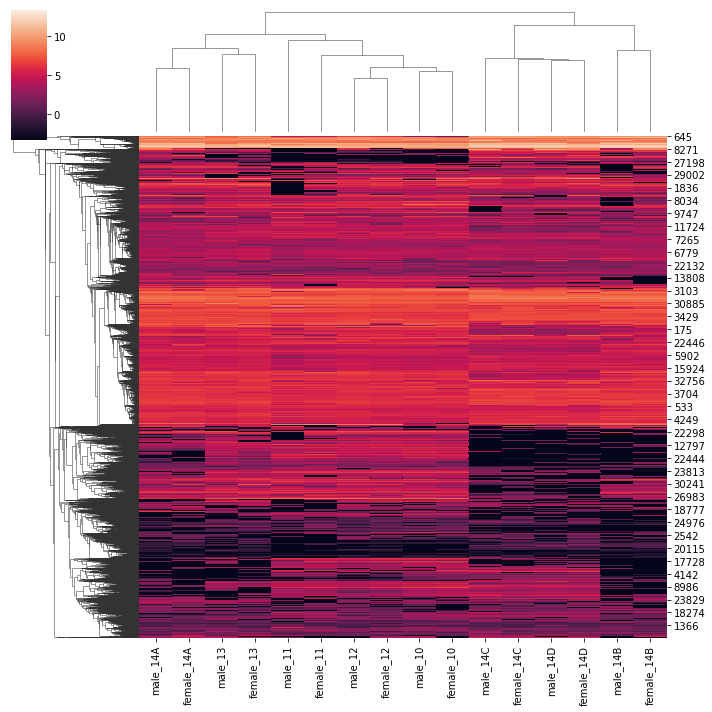

In [98]:
#heatmap with seaborn
g = sns.clustermap(FPKM_df.loc[:,"male_10":"female_14D"])
plt.savefig('heatmap')

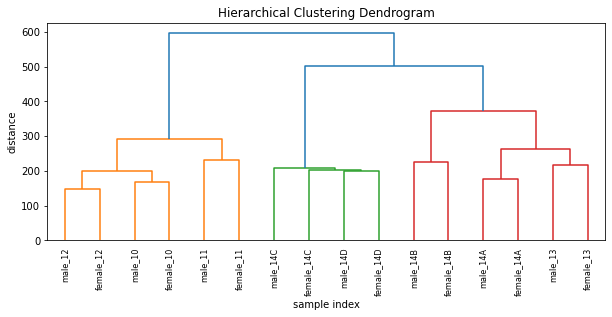

In [99]:
# calculate full dendrogram
plt.figure(figsize=(10, 4))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
labelList=list(FPKM_df.loc[:,"male_10":"female_14D"].head())
dendrogram(
    Z_sample,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,# font size for the x axis labels
    labels=labelList,
)
plt.savefig('dendrogram.png')
plt.show()

# Differential expression
## with sex

In [100]:
gene_FPKM_df=FPKM_df.loc[:,"male_10":"female_14D"].T
gene_FPKM_df.columns=FPKM_df.loc[:,"t_name"]
gene_FPKM_df['sex']=['male','male','male','male','male','male','male','male',
                 'female','female','female','female','female','female','female','female']
gene_FPKM_df['day']=[10,11,12,13,14,14,14,14,10,11,12,13,14,14,14,14]


In [101]:
pvalue_sex=[]
for gene in list(gene_FPKM_df.head())[:-2]:
    mod = smf.ols(formula=str(gene)+'~sex+1', data=gene_FPKM_df)
    result = mod.fit()
    pvalue_sex.append(result.pvalues[1])
len(pvalue_sex)

8613

In [102]:
FPKM_df['sex_p']=pvalue_sex
FPKM_df['sex_logP']=-np.log10(FPKM_df['sex_p'])

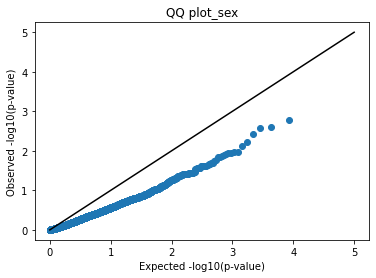

In [103]:
#QQ plot
#     dataframe['geneindex'] = range(len(FPKM))
FPKM_sorted = FPKM_df.sort_values(by = 'sex_p')
FPKM_sorted['uniform_points'] = range(0, len(FPKM_sorted))
FPKM_sorted['uniform_pval'] = (FPKM_sorted['uniform_points'] + 1) / len(FPKM_sorted)
FPKM_sorted['uniform_logP'] = -1 * np.log10(FPKM_sorted['uniform_pval'])
#     FPKM['snp_index'] = range(len(FPKM))
fig, ax = plt.subplots()
ax.scatter(FPKM_sorted["uniform_logP"], FPKM_sorted["sex_logP"])
ax.plot([5,0], [5, 0], color = "black")
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
plt.title("QQ plot_sex")
plt.savefig("QQ_plot_sex.png")
plt.show()

In [120]:
fdr_result=statsmodels.stats.multitest.fdrcorrection(pvalue_sex, alpha=0.1, method='indep', is_sorted=False)
FPKM_df['sex_cor_p']=fdr_result[1]
diff_gene_sex=FPKM_df[FPKM_df['sex_cor_p']<0.05]
diff_gene_sex

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,...,sex_p,sex_logP,sex_cor_p,day_p,day_logP,day_cor_p,col,male_mean,female_mean,fold2change


## Something is wrong here....

In [105]:
diff_gene_sex.to_csv ("differentially_expressed_genes_sex.csv", index = False, header=True)

## with day and sex

In [106]:
pvalue_day=[]
for gene in list(gene_FPKM_df.head())[:-2]:
    try:
        mod = smf.ols(formula=str(gene)+' ~ sex+day+1', data=gene_FPKM_df)
        result = mod.fit()
        pvalue_day.append(result.pvalues[1])
    except:
        pvalue_day.append('Nan')
len(pvalue_day)

8613

In [107]:
FPKM_df['day_p']=pvalue_day
FPKM_df['day_logP']=-np.log10(FPKM_df['day_p'])


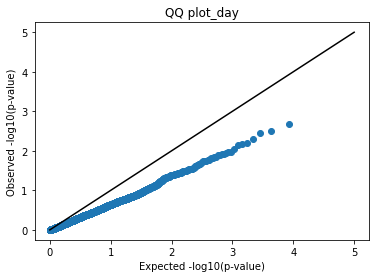

In [108]:
##QQ plot
FPKM_sorted = FPKM_df.sort_values(by = 'day_p')
FPKM_sorted['uniform_points'] = range(0, len(FPKM_sorted))
FPKM_sorted['uniform_pval'] = (FPKM_sorted['uniform_points'] + 1) / len(FPKM_sorted)
FPKM_sorted['uniform_logP'] = -1 * np.log10(FPKM_sorted['uniform_pval'])
fig, ax = plt.subplots()
ax.scatter(FPKM_sorted["uniform_logP"], FPKM_sorted["day_logP"])
ax.plot([5,0], [5, 0], color = "black")
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
plt.title("QQ plot_day")
plt.savefig("QQ_plot_day.png")
plt.show()

In [121]:
fdr_result_day=statsmodels.stats.multitest.fdrcorrection(pvalue_day, alpha=0.1, method='indep', is_sorted=False)
FPKM_df['day_cor_p']=fdr_result[1]


In [123]:
diff_gene_day=FPKM_df[FPKM_df['day_cor_p']<0.05]
diff_gene_day
# diff_gene_day.to_csv ("differentially_expressed_genes_sex_and_day.csv", index = False, header=True)

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,...,sex_p,sex_logP,sex_cor_p,day_p,day_logP,day_cor_p,col,male_mean,female_mean,fold2change


### no selected p value again here...

In [111]:
# diff_gene_sex_list=diff_gene_sex['t_name'].tolist()
# diff_gene_day_list=diff_gene_day['t_name'].tolist()

In [124]:
# count=0
# for gene in diff_gene_sex:
#     if gene in diff_gene_day:
#         count+=1
# overlap=count
# per_day=count/len(diff_gene_day)
# per_sex=count/len(diff_gene_sex)

# print(per_sex,per_day)

- 33.33% of the gene differentially expressed related to sex overlapped to gene differentially expressed related to sex and day

## volcano plot
### not sure what is the x axis here..

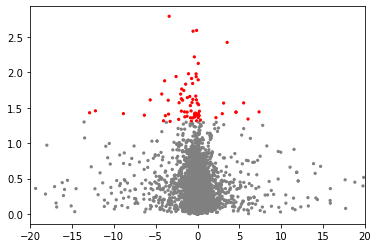

In [119]:
FPKM_df['male_mean'] = FPKM_df.loc[:,"male_10":"male_14D"].mean(axis=1)
FPKM_df['female_mean'] = FPKM_df.loc[:,"female_10":"female_14D"].mean(axis=1)
FPKM_df['fold2change'] = (FPKM_df['female_mean']-FPKM_df['male_mean'])/FPKM_df['male_mean']
FPKM_df['col'] =np.where(FPKM_df['sex_p']<0.05, 'red', 'grey')


fig,ax=plt.subplots()
plt.scatter(x=FPKM_df['fold2change'],y=FPKM_df['sex_logP'],c=FPKM_df['col'],s=5)
plt.xlim(-20,20)
plt.show()

In [114]:
FPKM_df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,...,female_14C,female_14D,median,sex_p,sex_logP,sex_cor_p,day_p,day_logP,day_cor_p,col
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,...,3.851021,4.112914,4.178105,0.964984,0.015480,0.999959,0.966161,0.014950,0.999959,grey
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,...,-3.321928,4.665883,2.908499,0.638587,0.194780,0.999959,0.626876,0.202819,0.999959,grey
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,...,2.897078,4.516802,4.063295,0.529577,0.276071,0.999959,0.526009,0.279007,0.999959,grey
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,...,5.621212,6.280001,5.675952,0.093559,1.028913,0.999959,0.049894,1.301956,0.999959,grey
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,...,5.736589,6.410012,6.217169,0.418440,0.378367,0.999959,0.409874,0.387349,0.999959,grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,...,6.239269,7.386673,6.168592,0.738731,0.131513,0.999959,0.710888,0.148199,0.999959,grey
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,...,6.523595,9.412730,7.725516,0.579112,0.237237,0.999959,0.538214,0.269045,0.999959,grey
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,...,9.435277,12.153787,10.902223,0.755627,0.121693,0.999959,0.761457,0.118355,0.999959,grey
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,...,-3.321928,-2.713053,-2.985605,0.460601,0.336676,0.999959,0.445895,0.350767,0.999959,grey
